## Question 1 - Data setup

In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

w_dir = "C:\\Users\\User\\OneDrive\\School\\2022\\compSoc\\Assignments\\Assignment_7"
d_dir = os.path.join(w_dir, "data")
f_dir = os.path.join(w_dir, "figs")

os.chdir(d_dir)

cir_19 = pd.read_csv("cir_19.csv", low_memory=False)
cir_20 = pd.read_csv("cir_20.csv", low_memory=False)

cir_join = pd.concat([cir_19, cir_20], ignore_index=True).drop_duplicates()
print(cir_join.columns)

# set na for values 0 where applicable
cir_join.loc[cir_join["DISTRICT"].isin([0, "External"]), "DISTRICT"] = np.nan
cir_join.loc[cir_join["Long"] == 0, "Long"] = np.nan
cir_join.loc[cir_join["Lat"] == 0, "Lat"] = np.nan

# clean data
cir_clean = cir_join.dropna(subset=["INCIDENT_NUMBER", "OFFENSE_CODE", "DISTRICT", "Long", "Lat", "OCCURRED_ON_DATE", "SHOOTING"])
print(cir_clean)


# create a offense type collumn and two bool column for each type
def offense_type(df, kw, colchk):
    for t in list(kw.keys()):
        for phrase in kw[t]:
            df.loc[df[colchk].str.lower().str.contains(phrase), "OFFENSE_TYPE"] = t
        df.loc[df["OFFENSE_TYPE"] ==t, t] = 1
    return df

kw_crime = {"violent": ["robbery", "assault", "rape"],
            "property": ["burglar", "larceny", "auto theft", "arson"]}


cir_wk = offense_type(cir_clean, kw_crime, "OFFENSE_DESCRIPTION")

# convert date to quarte and save in another column
cir_wk["QUARTER"] = pd.to_datetime(cir_wk["OCCURRED_ON_DATE"]).dt.quarter
print(cir_wk)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')
       INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0            102091671          2647                 NaN   
1            102095489          3115                 NaN   
2            102096818          2905                 NaN   
5            129099936          1106                 NaN   
6            129100024          3201                 NaN   
...                ...           ...                 ...   
158073       020063425          3114                 NaN   
158074       020062356          1107                 NaN   
158075       020046400          1501                 NaN   
158076       020038446          1501                 NaN   
158077       020030892           540                 NaN  

C:\Users\User\AppData\Local\Temp\ipykernel_19124\534143535.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df[colchk].str.lower().str.contains(phrase), "OFFENSE_TYPE"] = t
C:\Users\User\AppData\Local\Temp\ipykernel_19124\534143535.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["OFFENSE_TYPE"] ==t, t] = 1


       INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0            102091671          2647                 NaN   
1            102095489          3115                 NaN   
2            102096818          2905                 NaN   
5            129099936          1106                 NaN   
6            129100024          3201                 NaN   
...                ...           ...                 ...   
158073       020063425          3114                 NaN   
158074       020062356          1107                 NaN   
158075       020046400          1501                 NaN   
158076       020038446          1501                 NaN   
158077       020030892           540                 NaN   

                                      OFFENSE_DESCRIPTION DISTRICT  \
0                               THREATS TO DO BODILY HARM       B3   
1                                      INVESTIGATE PERSON      E18   
2                             VAL - VIOLATION OF AUTO LAW       A1   

C:\Users\User\AppData\Local\Temp\ipykernel_19124\534143535.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["OFFENSE_TYPE"] ==t, t] = 1
C:\Users\User\AppData\Local\Temp\ipykernel_19124\534143535.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cir_wk["QUARTER"] = pd.to_datetime(cir_wk["OCCURRED_ON_DATE"]).dt.quarter


## Questions 2 to 4: Data plots

    YEAR DISTRICT  violent  property
0   2019       A1   1138.0    1856.0
1   2019      A15    149.0     264.0
2   2019       A7    324.0     413.0
3   2019       B2   1234.0    1394.0
4   2019       B3   1057.0    1063.0
5   2019      C11    994.0    1654.0
6   2019       C6    584.0     919.0
7   2019      D14    416.0     878.0
8   2019       D4   1091.0    2752.0
9   2019      E13    417.0     683.0
10  2019      E18    346.0     596.0
11  2019       E5    248.0     429.0
12  2020       A1    717.0    1452.0
13  2020      A15     85.0     324.0
14  2020       A7    245.0     509.0
15  2020       B2    810.0    1397.0
16  2020       B3    576.0     783.0
17  2020      C11    613.0    1409.0
18  2020       C6    381.0    1081.0
19  2020      D14    241.0     954.0
20  2020       D4    745.0    2521.0
21  2020      E13    274.0     563.0
22  2020      E18    190.0     472.0
23  2020       E5    153.0     454.0


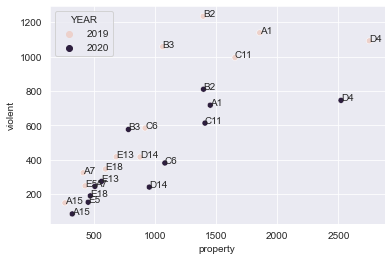

In [9]:
#plot7.2
tally = cir_wk.groupby(["YEAR", "DISTRICT"]).agg({"violent": "sum", "property": "sum"}).reset_index()
print(tally)

# the for loop is to label the points
sns.scatterplot(x="property", y="violent", data=tally, hue="YEAR")
for i in range(len(tally)):
    plt.text(x=tally.property[i], y=tally.violent[i], s=tally.DISTRICT[i])

plt.savefig(os.path.join(f_dir,"district_year_scatter.png"))

In [10]:
plt.close()

    YEAR DISTRICT  violent  property  sumvioprop
0   2019       A1   1138.0    1856.0      2994.0
1   2019      A15    149.0     264.0       413.0
2   2019       A7    324.0     413.0       737.0
3   2019       B2   1234.0    1394.0      2628.0
4   2019       B3   1057.0    1063.0      2120.0
5   2019      C11    994.0    1654.0      2648.0
6   2019       C6    584.0     919.0      1503.0
7   2019      D14    416.0     878.0      1294.0
8   2019       D4   1091.0    2752.0      3843.0
9   2019      E13    417.0     683.0      1100.0
10  2019      E18    346.0     596.0       942.0
11  2019       E5    248.0     429.0       677.0
12  2020       A1    717.0    1452.0      2169.0
13  2020      A15     85.0     324.0       409.0
14  2020       A7    245.0     509.0       754.0
15  2020       B2    810.0    1397.0      2207.0
16  2020       B3    576.0     783.0      1359.0
17  2020      C11    613.0    1409.0      2022.0
18  2020       C6    381.0    1081.0      1462.0
19  2020      D14   

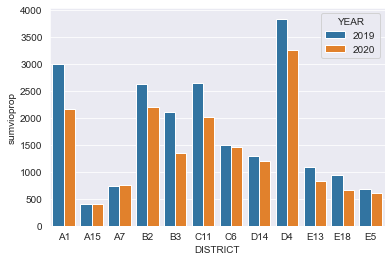

In [11]:
# plot7.3
tally["sumvioprop"] = tally["violent"] + tally["property"]
print(tally)

sns.barplot(x="DISTRICT", y="sumvioprop", data=tally, hue="YEAR")
plt.savefig(os.path.join(f_dir,"district_year_bar"))

In [12]:
plt.close()

   DISTRICT  QUARTER  SHOOTING
0        A1        1         2
1        A1        2         8
2        A1        3         4
3        A1        4         7
4       A15        1         0
5       A15        2         4
6       A15        3         6
7       A15        4         3
8        A7        1         6
9        A7        2        10
10       A7        3         9
11       A7        4         6
12       B2        1        85
13       B2        2       154
14       B2        3       167
15       B2        4       119
16       B3        1        70
17       B3        2       137
18       B3        3       190
19       B3        4       110
20      C11        1        65
21      C11        2       104
22      C11        3       127
23      C11        4        80
24       C6        1         4
25       C6        2         8
26       C6        3        16
27       C6        4        13
28      D14        1         5
29      D14        2        10
30      D14        3         7
31      

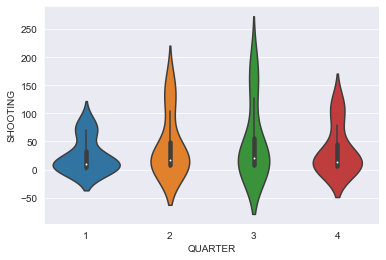

In [13]:
# plot7.4
quart_shooting = cir_wk.groupby(["DISTRICT", "QUARTER"]).agg({"SHOOTING": sum}).reset_index()
print(quart_shooting)

sns.violinplot(x="QUARTER", y="SHOOTING", data=quart_shooting)
plt.savefig(os.path.join(f_dir,"shooting_quarter_violin"))

In [14]:
plt.close()